## Projeto Decision Tree: Sistemas Inteligentes

#### 🎯 Objetivos:

Neste projeto, usaremos uma árvore de decisão em um conjunto de dados sobre o Titanic com o objetivo de identificar as pessoas sobreviveram ao acidente através de dados sobre sua idade, gênero e tipo do ticket para o navio.

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 5

#### 🎲 Importando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Sistemas Inteligentes/train.csv')

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nota-se a presença de dados faltantes nas colunas "Age", "Cabin" e "Embarked"



In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print('Tamanho do Dataset:', df.shape)

Tamanho do Dataset: (891, 12)


#### Dicionário dos dados

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

#### 🧹🪣 Data Cleaning

In [ ]:
print(df[df['Age'].isnull()].shape)
print(df[df['Cabin'].isnull()].shape)
print(df[df['Embarked'].isnull()].shape)

(177, 12)
(687, 12)
(2, 12)


##### Retirando a coluna "Cabin":

In [ ]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Retira-se a coluna "Cabin", pois é a que possui mais de 75% de dados faltantes e preencher esses dados faltantes não seria viável, podendo atrapalhar na classificação

##### Substituindo valores nulos da coluna "Age":

<Axes: xlabel='Pclass', ylabel='Age'>

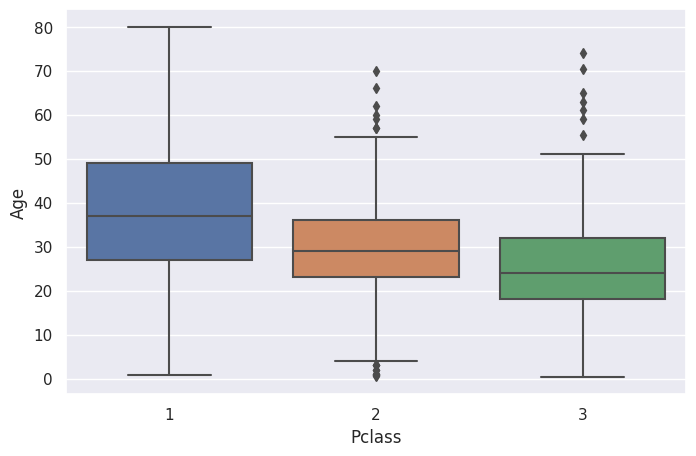

In [ ]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age')

Para a coluna "Age" utiliza-se de uma estratégia de preencher os dados faltantes com a mediana de idade de para cada uma das classes de acomodação de cada passageiro.

In [ ]:
print('Mediana da idade das pessoas da primeira classe:', df[df['Pclass'] == 1]['Age'].median())
print('Mediana da idade das pessoas da segunda classe:', df[df['Pclass'] == 2]['Age'].median())
print('Mediana da idade das pessoas da terceira classe:', df[df['Pclass'] == 3]['Age'].median())

Mediana da idade das pessoas da primeira classe: 37.0
Mediana da idade das pessoas da segunda classe: 29.0
Mediana da idade das pessoas da terceira classe: 24.0


In [ ]:
def age_inputs(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(age_inputs, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Com a coluna "Age" devidamente preenchida ainda é necessária alguma estratégia para resolver os dados faltantes da coluna "Embarked"

##### Retirando as linhas que têm valor nulo na coluna "Embarked":

Para coluna "Embarked" é mais interessante excluir os 2 dados que estão faltantes, pois sua exclusão não influência muito no comportamento do resto do conjunto de dados.

In [ ]:
df.dropna(inplace=True)

#### 🔎📊 Análise Exploratória:

In [ ]:
print('Sobreviveram:', df['Survived'].value_counts()[1])
print('Não Sobreviveram:', df['Survived'].value_counts()[0])

Sobreviveram: 340
Não Sobreviveram: 549


In [ ]:
corr_matrix = df[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare',	'Embarked']].corr()

<Axes: >

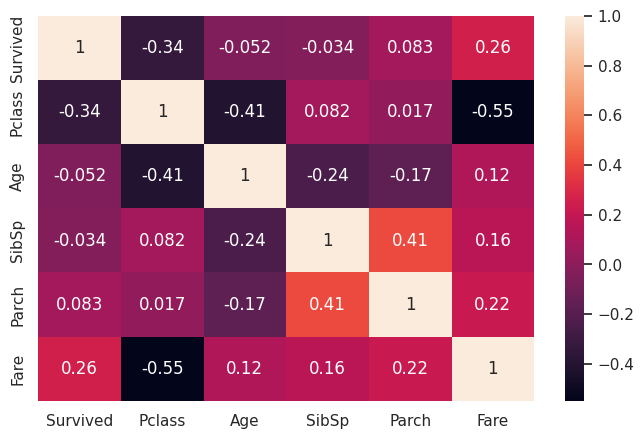

In [ ]:
sns.heatmap(corr_matrix, annot=True)

Correlação entre as variáveis do conjunto de dados.

<Axes: xlabel='Pclass', ylabel='Fare'>

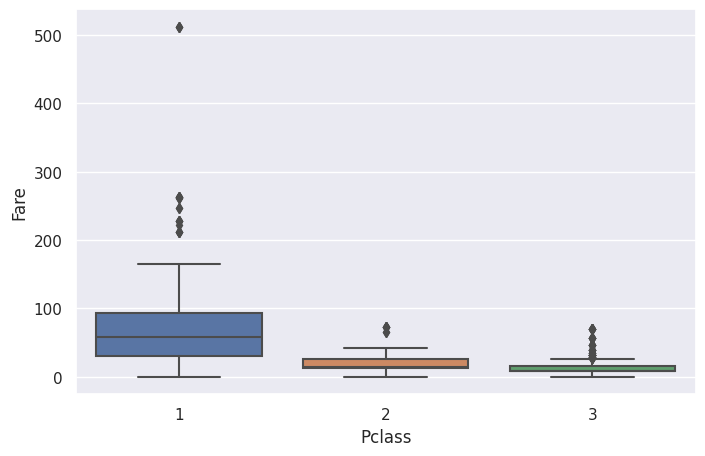

In [ ]:
sns.boxplot(data = df, x = 'Pclass', y = 'Fare')

Distribuição das tarifas entre as classes de acomodação de passageiros.

In [ ]:
np.where(df['Fare'] > 500)

(array([257, 678, 736]),)

Nota-se a presença de outliers muito discrepantes do resto das amostras. Onde apenas 3 passageiros pagaram uma tarifa muito alta. Maior que 500 dolares na época.

In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


A taxa de sobrevivência também mostra que passageiros com melhores classes de acomodação tinham mais chances de sobreviverem que os com piores classes de acomodação.

<Axes: xlabel='Survived', ylabel='count'>

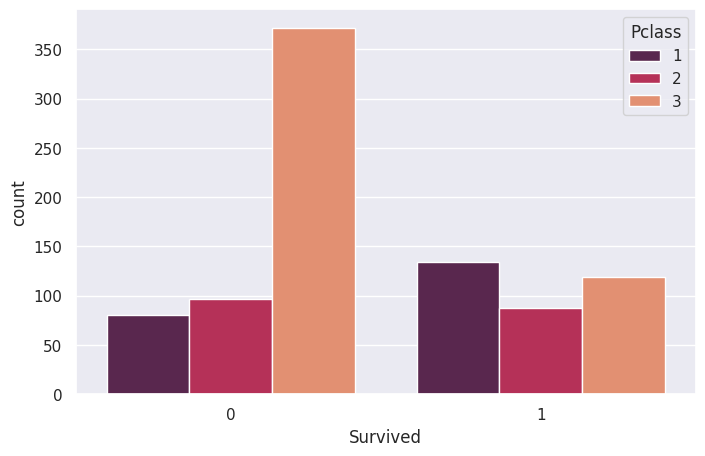

In [ ]:
sns.countplot(data = df, x = 'Survived', hue= 'Pclass', palette = 'rocket')

Por este gráfico é notável que muito mais pessoas da 3a classe não sobreviveram.

In [ ]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


A probabilidade de sobrevivência se o indivíduo fosse do sexo feminino é expressivamente maior do que do sexo masculino.

<Axes: xlabel='Survived', ylabel='count'>

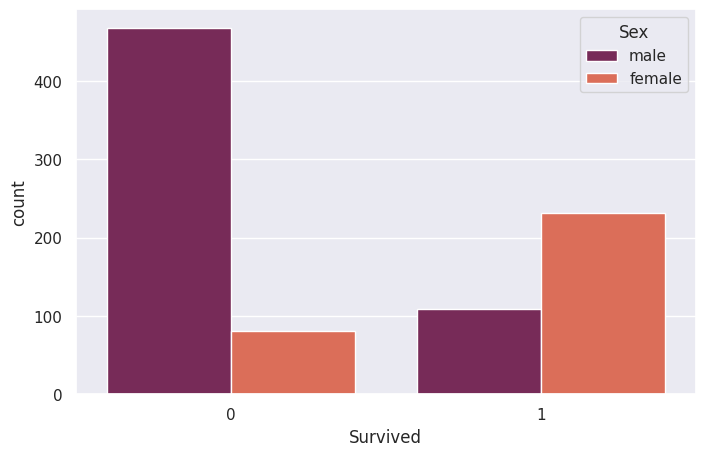

In [ ]:
sns.countplot(data = df, x = 'Survived', hue= 'Sex', palette = 'rocket')

O que fica muito mais aparente na análise gráfica.

<Axes: xlabel='Survived', ylabel='count'>

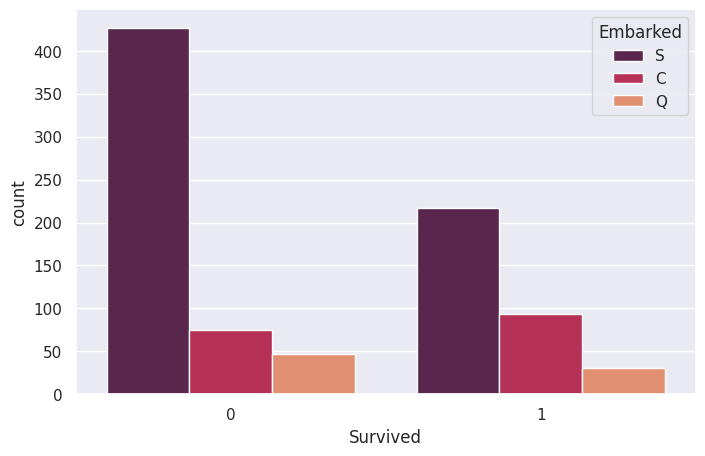

In [ ]:
sns.countplot(data = df, x = 'Survived', hue= 'Embarked', palette = 'rocket')

Nesse gráfico analisá-se a chance de sobrevivência de acordo com o porto embarcado. Sendo muito maior se o indivíduo embarcou em Cherbourg, do que em Queenstown ou Southampton.

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
df[["Embarked", "Survived", 'Fare']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Embarked,Survived,Fare
0,C,0.553571,59.954144
2,S,0.336957,27.079812
1,Q,0.389610,13.276030


<ipython-input-135-f4bd79f7df04>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = df, x = 'Age', palette = 'rocket', bins=30)


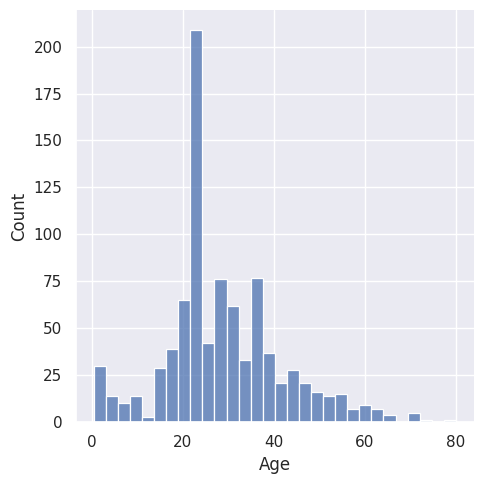

In [ ]:
sns.displot(data = df, x = 'Age', palette = 'rocket', bins=30)

Gráfico da distribuição de idade dos passageiros

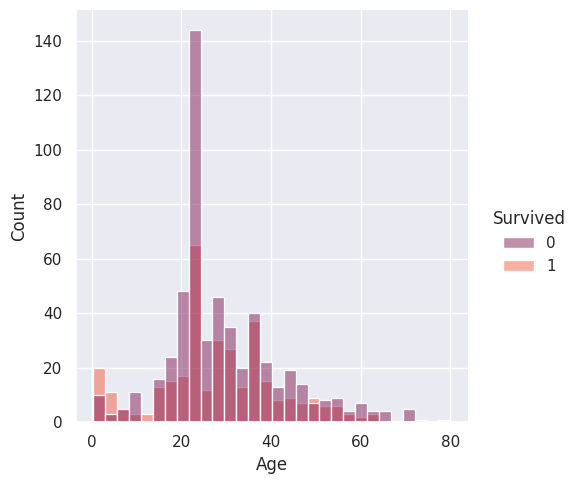

In [ ]:
sns.displot(data = df, x = 'Age', palette = 'rocket', bins=30, hue= 'Survived')

Gráfico sobreposto das distribuições dos que morreram e dos que viveram.

#### ✅ Feature Selection

In [ ]:
features= ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare',	'Embarked', 'Survived']
df = df[features]

In [ ]:
df.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,22.0,male,1,0,7.2500,S,0
1,1,38.0,female,1,0,71.2833,C,1
2,3,26.0,female,0,0,7.9250,S,1
3,1,35.0,female,1,0,53.1000,S,1
4,3,35.0,male,0,0,8.0500,S,0


Foram removidas as colunas "Name" e "Ticket", pois suas informações não são úteis para classficiação, pois são únicas de cada indivíduo. Também foi excluida a coluna "Cabin" pela quantidade de dados faltantes.

#### ✅ Tratando variáveis categóricas

In [ ]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])

In [ ]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


Variváeis categóricas precisam ser discretizadas para fazerem sentido para o modelo. Para isso se cria novas colunas para cada uma das classes categóricas e utilizando lógica binária atribui-se o valor de 0 ou 1 do dado a coluna correspondente.

#### 🗂️ Definindo a matriz de atributos e o vetor target:


In [ ]:
X = df.drop(columns = 'Survived')
y = df['Survived']

#### ✂️ Separando nosso dataset em um set de treino e um set de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 🏋️ Treinando...

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       141
           1       0.67      0.72      0.69        82

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.77      0.77       223



- A precisão mede quantas das previsões positivas do modelo são realmente corretas
- A acurácia é uma medida geral de avaliação que mede a proporção de previsões corretas
- O F1-Score é uma medida de avaliação que considera tanto a precisão quanto o recall.
- O recall mede a capacidade do modelo em detectar todos os exemplos positivos

#### 🤔 Analisando a matriz de confusão do modelo

In [ ]:
cf_matrix_nb = confusion_matrix(y_test, y_pred)
print(cf_matrix_nb)

[[112  29]
 [ 23  59]]


<Axes: >

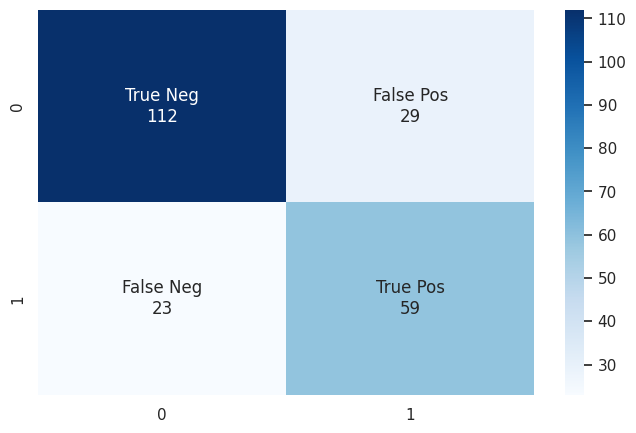

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb, annot=labels, fmt= '', cmap='Blues')

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
376,3,22.0,0,0,7.2500,1,0,0,0,1
458,2,50.0,0,0,10.5000,1,0,0,0,1
732,2,29.0,0,0,0.0000,0,1,0,0,1
507,1,37.0,0,0,26.5500,0,1,0,0,1
830,3,15.0,1,0,14.4542,1,0,1,0,0


#### 🌳 Visualizando a árvore que o modelo construiu

In [ ]:
clf_plot_tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

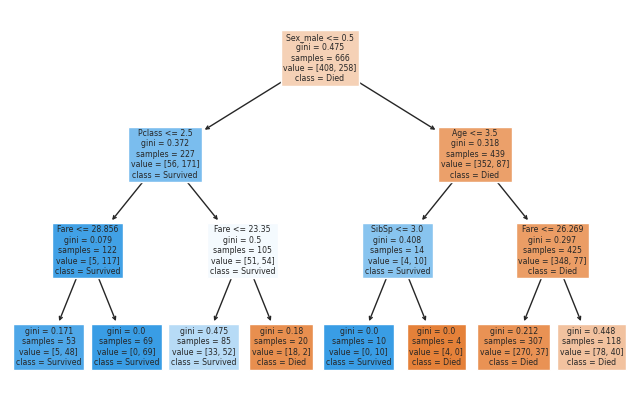

In [ ]:
fn = ['Pclass',	'Age', 'SibSp',	'Parch', 'Fare',	'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q'	,'Embarked_S']
cn = ['Died', 'Survived']

plot_tree(clf_plot_tree,
            feature_names = fn,
            class_names=cn,
            filled = True);

#### 🔋Melhorando o modelo: fine tuning

Existem inúmeros hiperparâmetros que podem ser ajustados em modelos, e encontrar a combinação ideal deles pode ser considerado um desafio de busca. Atualmente, há diversos algoritmos de otimização disponíveis para essa tarefa, mas uma técnica simples é a GridSearch!

Para ajustar os hiperparâmetros no scikit-learn, pode-se utilizar o método GridSearchCV, que encontra de maneira eficiente os valores ideais dos hiperparâmetros dentre os fornecidos.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [ ]:
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [ ]:
print('Best parameters found:\n', grid_search.best_params_)

Best parameters found:
 {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}


In [ ]:
clf_tuned = DecisionTreeClassifier(max_features = 'log2',
                            ccp_alpha = 0.001,
                            max_depth = 7,
                            criterion = 'entropy')

#### 🏋️ Treinando...

In [ ]:
clf_tuned = clf_tuned.fit(X_train, y_train)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
y_pred_tuned = clf_tuned.predict(X_test)

In [ ]:
class_report = classification_report(y_test, y_pred_tuned)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       141
           1       0.79      0.70      0.74        82

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223




Nota-se uma melhora do desempenho quando há a alteração dos hiperparâmetros.

#### 🤔 Analisando a matriz de confusão do modelo

In [ ]:
cf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cf_matrix_nb_tuned)

[[126  15]
 [ 25  57]]


<Axes: >

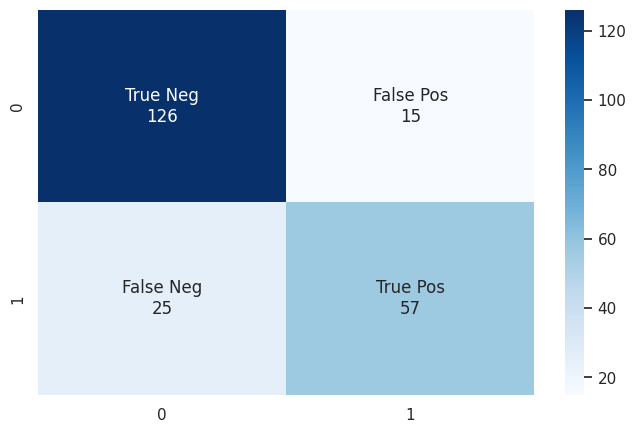

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb_tuned.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb_tuned, annot=labels, fmt= '', cmap='Blues')

#### 🌳🌳 Utilizando o Random Forest

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
class_report = classification_report(y_test, y_pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       141
           1       0.72      0.72      0.72        82

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [ ]:
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix_rf)

[[118  23]
 [ 23  59]]


#### 🤔 Analisando a matriz de confusão do modelo

<Axes: >

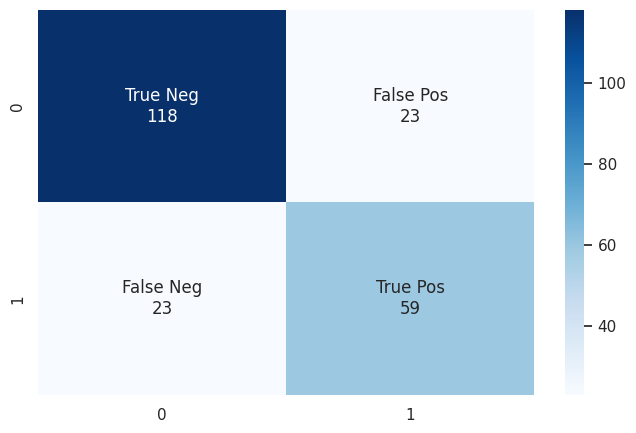

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_rf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_rf, annot=labels, fmt= '', cmap='Blues')

No caso do Random Forest, esperavá-se uma melhoria em relação ao uso da árvore de decisão, o que foi notado em relação ao treinamento da árvode de decisão com os hiperparâmetros padrão. Mas em relação a árvore com os melhores hiperparâmetros, o comportamento foi diferente do esperado.